# E-commerce Business Analytics Dashboard

**Analysis Period:** 2023 with Year-over-Year Comparison

---

## Table of Contents

1. [Introduction and Business Objectives](#1-introduction-and-business-objectives)
2. [Data Dictionary](#2-data-dictionary)
3. [Configuration and Setup](#3-configuration-and-setup)
4. [Data Loading](#4-data-loading)
5. [Data Preparation](#5-data-preparation)
6. [Business Metrics Analysis](#6-business-metrics-analysis)
   - [6.1 Revenue Analysis](#61-revenue-analysis)
   - [6.2 Order Metrics](#62-order-metrics)
   - [6.3 Product Performance](#63-product-performance)
   - [6.4 Geographic Analysis](#64-geographic-analysis)
   - [6.5 Customer Experience](#65-customer-experience)
7. [Key Findings and Recommendations](#7-key-findings-and-recommendations)

---

## 1. Introduction and Business Objectives

This notebook provides a comprehensive analysis of our e-commerce business performance for 2023, with comparisons to 2022 to identify trends and opportunities.

### Business Questions Addressed:

1. **Revenue Performance**: How did our revenue perform in 2023 compared to 2022?
2. **Growth Trends**: What is the month-over-month growth trend throughout 2023?
3. **Product Insights**: Which product categories are driving the most revenue?
4. **Geographic Distribution**: Which states/regions contribute most to our revenue?
5. **Customer Experience**: How are delivery times impacting customer satisfaction?
6. **Operational Efficiency**: What is our on-time delivery performance?

### Methodology:

- Focus on **delivered orders** to analyze actual completed transactions
- Use configurable date ranges for flexible analysis
- Leverage custom metrics modules for consistent calculations
- Provide visualizations with clear business context

## 2. Data Dictionary

### Key Datasets

| Dataset | Description | Key Columns |
|---------|-------------|-------------|
| **Orders** | Main order transactions | order_id, customer_id, order_status, order_purchase_timestamp |
| **Order Items** | Line items within each order | order_id, product_id, price, freight_value |
| **Products** | Product catalog information | product_id, product_category_name |
| **Customers** | Customer profile data | customer_id, customer_state, customer_city |
| **Reviews** | Customer feedback and ratings | order_id, review_score (1-5) |

### Key Business Terms

- **Revenue**: Total price value from delivered orders (excluding freight)
- **AOV (Average Order Value)**: Total revenue divided by number of orders
- **MoM Growth**: Month-over-Month percentage change in revenue
- **YoY Growth**: Year-over-Year percentage change comparing 2023 to 2022
- **Delivery Days**: Days between order purchase and actual delivery
- **On-Time Delivery Rate**: Percentage of orders delivered by estimated date
- **Review Score**: Customer rating from 1 (worst) to 5 (best)

## 3. Configuration and Setup

Configure the analysis parameters here for easy experimentation with different time periods.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

# Import custom modules
from data_loader import EcommerceDataLoader
from business_metrics import (
    RevenueMetrics,
    OrderMetrics,
    CustomerExperienceMetrics,
    MetricsSummary
)

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✓ Libraries imported successfully")

Matplotlib is building the font cache; this may take a moment.


✓ Libraries imported successfully


In [2]:
# CONFIGURATION PARAMETERS
# Modify these to analyze different time periods

CURRENT_YEAR = 2023
COMPARISON_YEAR = 2022
DATA_DIR = 'ecommerce_data'
ORDER_STATUS = 'delivered'  # Focus on completed orders

# Optional: Set specific month (None = entire year)
CURRENT_MONTH = None
COMPARISON_MONTH = None

print(f"Analysis Configuration:")
print(f"  Current Period: {CURRENT_YEAR}" + (f"/{CURRENT_MONTH}" if CURRENT_MONTH else ""))
print(f"  Comparison Period: {COMPARISON_YEAR}" + (f"/{COMPARISON_MONTH}" if COMPARISON_MONTH else ""))
print(f"  Order Status Filter: {ORDER_STATUS}")

Analysis Configuration:
  Current Period: 2023
  Comparison Period: 2022
  Order Status Filter: delivered


## 4. Data Loading

Load all required datasets using the custom data loader module.

In [3]:
# Initialize data loader
loader = EcommerceDataLoader(data_dir=DATA_DIR)

# Load all datasets
print("Loading datasets...")
datasets = loader.load_all_datasets()

print("\n✓ Data loaded successfully\n")

# Display data summary
summary = loader.get_data_summary()
print("Dataset Summary:")
print("="*80)
for name, stats in summary.items():
    print(f"\n{name.upper()}:")
    print(f"  Rows: {stats['rows']:,}")
    print(f"  Columns: {stats['columns']}")
    print(f"  Memory: {stats['memory_usage_mb']:.2f} MB")

Loading datasets...

✓ Data loaded successfully

Dataset Summary:

ORDERS:
  Rows: 10,000
  Columns: 8
  Memory: 2.41 MB

ORDER_ITEMS:
  Rows: 16,047
  Columns: 7
  Memory: 4.06 MB

PRODUCTS:
  Rows: 6,000
  Columns: 9
  Memory: 1.13 MB

CUSTOMERS:
  Rows: 8,000
  Columns: 5
  Memory: 2.08 MB

REVIEWS:
  Rows: 6,571
  Columns: 7
  Memory: 2.32 MB

PAYMENTS:
  Rows: 14,091
  Columns: 5
  Memory: 2.15 MB


## 5. Data Preparation

Create comprehensive sales datasets for the current and comparison periods.

In [4]:
# Create sales dataset for current year
print(f"Preparing {CURRENT_YEAR} sales data...")
sales_current = loader.create_sales_dataset(
    year=CURRENT_YEAR,
    month=CURRENT_MONTH,
    status_filter=ORDER_STATUS
)

# Create sales dataset for comparison year
print(f"Preparing {COMPARISON_YEAR} sales data...")
sales_comparison = loader.create_sales_dataset(
    year=COMPARISON_YEAR,
    month=COMPARISON_MONTH,
    status_filter=ORDER_STATUS
)

# Get orders data for status analysis
orders_current = datasets['orders'][datasets['orders']['order_purchase_timestamp'].dt.year == CURRENT_YEAR]

print(f"\n✓ Data preparation complete")
print(f"\n{CURRENT_YEAR} Sales Records: {len(sales_current):,}")
print(f"{COMPARISON_YEAR} Sales Records: {len(sales_comparison):,}")

# Display sample data
print(f"\nSample {CURRENT_YEAR} Sales Data:")
sales_current.head(3)

Preparing 2023 sales data...
Preparing 2022 sales data...

✓ Data preparation complete

2023 Sales Records: 7,448
2022 Sales Records: 7,641

Sample 2023 Sales Data:


,order_id,order_item_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,year,month,quarter,day_of_week,delivery_days,delivery_delay_days,product_category_name,customer_state,customer_city,review_score
0,ord_5fa044951857e02fd1347b47,1,prod_9b6f1793388ae983f852d189,sell_34212979d97b6d1a8409a01e,111.91,9.50,cust_2d36e4b647be13c15df550af,delivered,2023-04-24 13:05:32.579655,2023-05-01 02:05:32.579655,2023-05-11 02:05:32.579655,2023,4,2,0,6,-10,grocery_gourmet_food,TN,Knoxville,5.00
1,ord_5fa044951857e02fd1347b47,2,prod_c7b5997a4d0061a9f50e874c,sell_4668fb88b81f8d834371c335,878.42,77.50,cust_2d36e4b647be13c15df550af,delivered,2023-04-24 13:05:32.579655,2023-05-01 02:05:32.579655,2023-05-11 02:05:32.579655,2023,4,2,0,6,-10,electronics,TN,Knoxville,5.00
2,ord_43b53981d951f855231d09ec,1,prod_496e129d773e9587e8ddc065,sell_6cfe47a34211c0b92f0fd126,749.83,13.94,cust_e670ce607e4f6aa14935ece0,delivered,2023-12-10 05:13:58.249202,2023-12-19 09:13:58.249202,2023-12-18 09:13:58.249202,2023,12,4,6,9,1,sports_outdoors,FL,Orlando,5.00


## 6. Business Metrics Analysis

### 6.1 Revenue Analysis

Analyze overall revenue performance and trends.

In [5]:
# Calculate revenue metrics
revenue_current = RevenueMetrics.calculate_total_revenue(sales_current)
revenue_comparison = RevenueMetrics.calculate_total_revenue(sales_comparison)
revenue_growth = RevenueMetrics.calculate_revenue_growth(sales_current, sales_comparison)

print("="*80)
print("REVENUE PERFORMANCE")
print("="*80)
print(f"\n{CURRENT_YEAR} Total Revenue: ${revenue_current:,.2f}")
print(f"{COMPARISON_YEAR} Total Revenue: ${revenue_comparison:,.2f}")
print(f"\nYear-over-Year Growth: {revenue_growth*100:+.2f}%")

growth_direction = "📈 Increase" if revenue_growth > 0 else "📉 Decrease"
print(f"\n{growth_direction} of ${abs(revenue_current - revenue_comparison):,.2f}")

REVENUE PERFORMANCE

2023 Total Revenue: $3,360,294.74
2022 Total Revenue: $3,445,076.96

Year-over-Year Growth: -2.46%

📉 Decrease of $84,782.22


In [6]:
# Monthly revenue trend
monthly_revenue = RevenueMetrics.calculate_monthly_revenue(sales_current)
mom_growth = RevenueMetrics.calculate_mom_growth(sales_current)

print("\nMONTHLY REVENUE BREAKDOWN")
print("="*80)
print(monthly_revenue.to_string(index=False))

avg_mom_growth = mom_growth.mean()
print(f"\nAverage Month-over-Month Growth: {avg_mom_growth*100:+.2f}%")


MONTHLY REVENUE BREAKDOWN
 year  month   revenue
 2023      1 284855.48
 2023      2 276758.54
 2023      3 285618.77
 2023      4 253794.62
 2023      5 301347.96
 2023      6 289126.72
 2023      7 296209.39
 2023      8 286645.60
 2023      9 303793.15
 2023     10 259890.15
 2023     11 259518.93
 2023     12 262735.43

Average Month-over-Month Growth: -0.39%


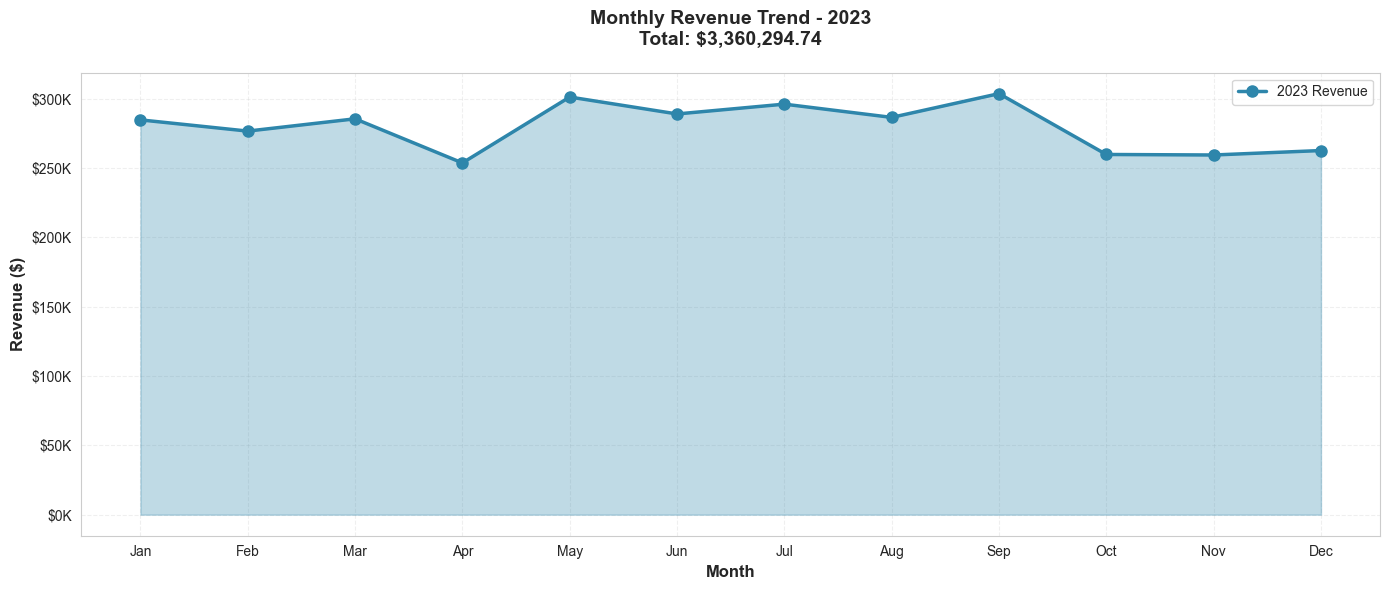

In [7]:
# Visualize monthly revenue trend
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(
    monthly_revenue['month'],
    monthly_revenue['revenue'],
    marker='o',
    linewidth=2.5,
    markersize=8,
    color='#2E86AB',
    label=f'{CURRENT_YEAR} Revenue'
)

ax.fill_between(
    monthly_revenue['month'],
    monthly_revenue['revenue'],
    alpha=0.3,
    color='#2E86AB'
)

ax.set_xlabel('Month', fontsize=12, fontweight='bold')
ax.set_ylabel('Revenue ($)', fontsize=12, fontweight='bold')
ax.set_title(
    f'Monthly Revenue Trend - {CURRENT_YEAR}\nTotal: ${revenue_current:,.2f}',
    fontsize=14,
    fontweight='bold',
    pad=20
)

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(fontsize=10)

plt.tight_layout()
plt.show()

### 6.2 Order Metrics

Analyze order volume and average order value.

In [8]:
# Calculate order metrics
orders_current_count = OrderMetrics.calculate_total_orders(sales_current)
orders_comparison_count = OrderMetrics.calculate_total_orders(sales_comparison)
order_growth = OrderMetrics.calculate_order_growth(sales_current, sales_comparison)

aov_current = OrderMetrics.calculate_average_order_value(sales_current)
aov_comparison = OrderMetrics.calculate_average_order_value(sales_comparison)
aov_change = (aov_current - aov_comparison) / aov_comparison

items_per_order = OrderMetrics.calculate_items_per_order(sales_current)

print("="*80)
print("ORDER METRICS")
print("="*80)
print(f"\n{CURRENT_YEAR} Total Orders: {orders_current_count:,}")
print(f"{COMPARISON_YEAR} Total Orders: {orders_comparison_count:,}")
print(f"Year-over-Year Order Growth: {order_growth*100:+.2f}%")

print(f"\n{CURRENT_YEAR} Average Order Value: ${aov_current:,.2f}")
print(f"{COMPARISON_YEAR} Average Order Value: ${aov_comparison:,.2f}")
print(f"AOV Change: {aov_change*100:+.2f}%")

print(f"\nAverage Items per Order: {items_per_order:.2f}")

ORDER METRICS

2023 Total Orders: 4,635
2022 Total Orders: 4,749
Year-over-Year Order Growth: -2.40%

2023 Average Order Value: $724.98
2022 Average Order Value: $725.43
AOV Change: -0.06%

Average Items per Order: 1.61



ORDER STATUS DISTRIBUTION
    status  count  percentage
 delivered   4635       93.64
   shipped    158        3.19
  canceled     64        1.29
processing     59        1.19
   pending     25        0.51
  returned      9        0.18


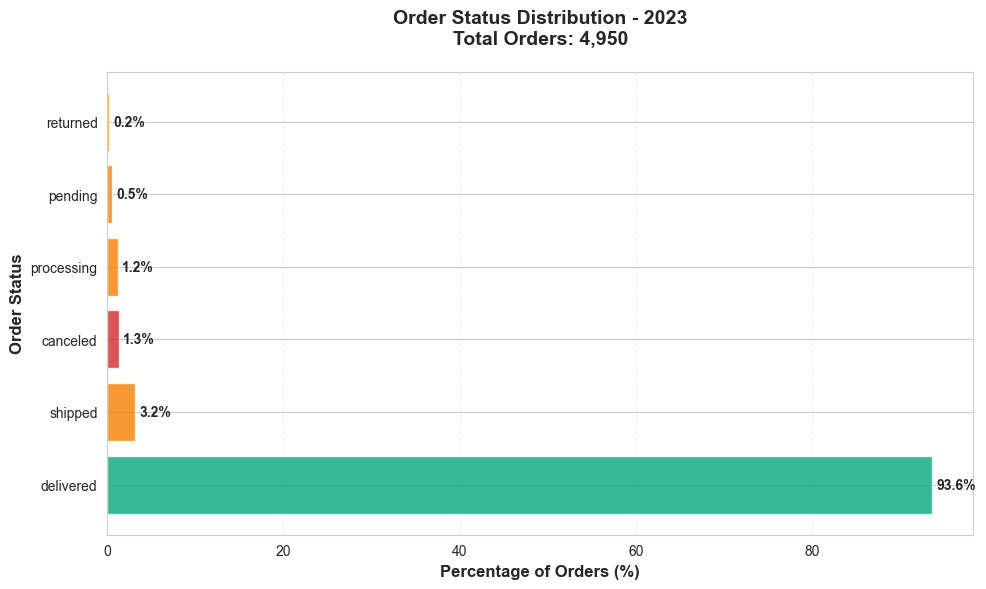

In [9]:
# Order status distribution
status_dist = OrderMetrics.calculate_order_status_distribution(orders_current)

print("\nORDER STATUS DISTRIBUTION")
print("="*80)
print(status_dist.to_string(index=False))

# Visualize status distribution
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#06A77D' if status == 'delivered' else '#D62828' if status == 'canceled'
          else '#F77F00' for status in status_dist['status']]

ax.barh(status_dist['status'], status_dist['percentage'], color=colors, alpha=0.8)

ax.set_xlabel('Percentage of Orders (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Order Status', fontsize=12, fontweight='bold')
ax.set_title(
    f'Order Status Distribution - {CURRENT_YEAR}\nTotal Orders: {len(orders_current):,}',
    fontsize=14,
    fontweight='bold',
    pad=20
)

for i, (status, pct) in enumerate(zip(status_dist['status'], status_dist['percentage'])):
    ax.text(pct + 0.5, i, f'{pct:.1f}%', va='center', fontweight='bold')

ax.grid(True, alpha=0.3, axis='x', linestyle='--')
plt.tight_layout()
plt.show()

### 6.3 Product Performance

Identify top-performing product categories.

In [10]:
# Calculate revenue by category
category_revenue = RevenueMetrics.calculate_revenue_by_category(sales_current)

# Calculate category share of total revenue
category_revenue['revenue_share_pct'] = (
    category_revenue['revenue'] / revenue_current * 100
)

print("="*80)
print("TOP PRODUCT CATEGORIES BY REVENUE")
print("="*80)
print(category_revenue.head(10).to_string(index=False))

top_3_revenue = category_revenue.head(3)['revenue'].sum()
top_3_share = top_3_revenue / revenue_current * 100
print(f"\nTop 3 Categories Account for: {top_3_share:.1f}% of total revenue")

TOP PRODUCT CATEGORIES BY REVENUE
              category    revenue  revenue_share_pct
           electronics 1401359.21              41.70
           home_garden  862653.27              25.67
       sports_outdoors  278845.32               8.30
            automotive  247707.10               7.37
clothing_shoes_jewelry  232745.04               6.93
            toys_games   70163.64               2.09
  health_personal_care   65370.27               1.95
tools_home_improvement   54280.33               1.62
  beauty_personal_care   49213.30               1.46
           books_media   38559.08               1.15

Top 3 Categories Account for: 75.7% of total revenue


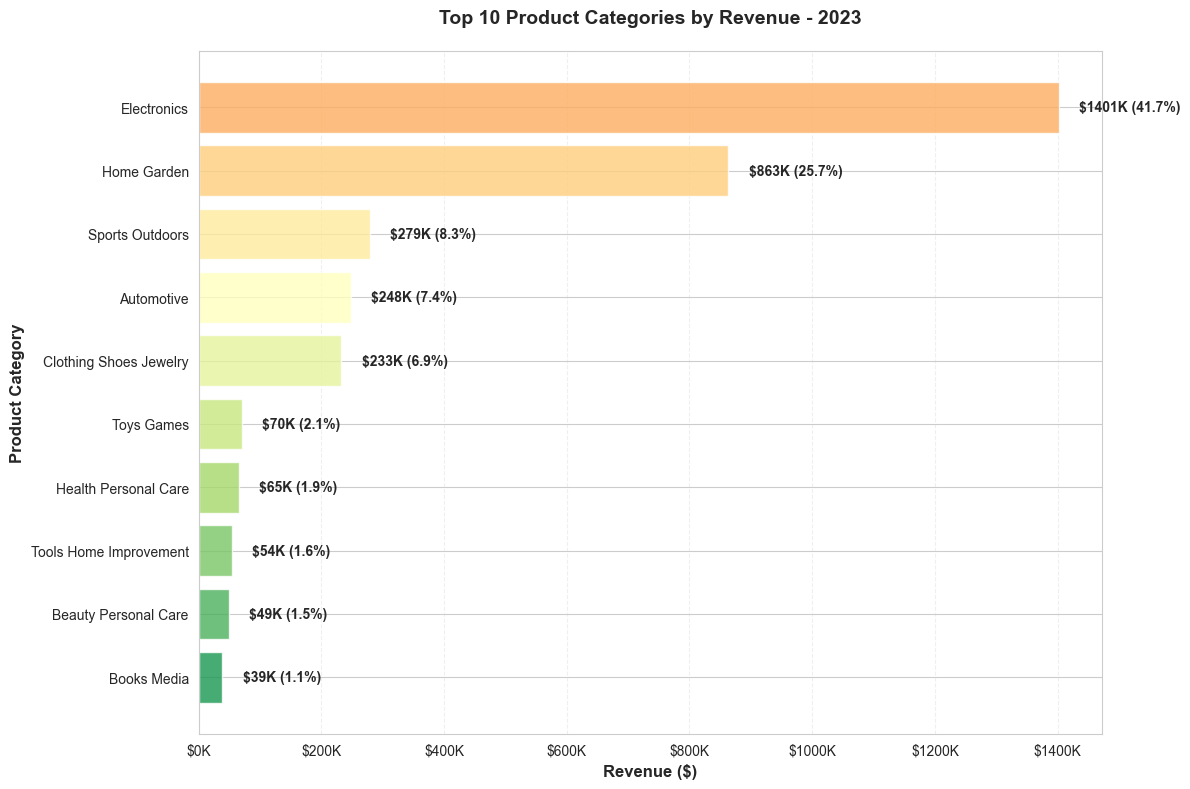

In [11]:
# Visualize top 10 categories
top_categories = category_revenue.head(10)

fig, ax = plt.subplots(figsize=(12, 8))

colors = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(top_categories)))

bars = ax.barh(
    range(len(top_categories)),
    top_categories['revenue'],
    color=colors,
    alpha=0.8
)

ax.set_yticks(range(len(top_categories)))
ax.set_yticklabels(top_categories['category'].str.replace('_', ' ').str.title())
ax.invert_yaxis()

ax.set_xlabel('Revenue ($)', fontsize=12, fontweight='bold')
ax.set_ylabel('Product Category', fontsize=12, fontweight='bold')
ax.set_title(
    f'Top 10 Product Categories by Revenue - {CURRENT_YEAR}',
    fontsize=14,
    fontweight='bold',
    pad=20
)

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

for i, (revenue, share) in enumerate(zip(top_categories['revenue'], top_categories['revenue_share_pct'])):
    ax.text(
        revenue + revenue_current * 0.01,
        i,
        f'${revenue/1000:.0f}K ({share:.1f}%)',
        va='center',
        fontweight='bold'
    )

ax.grid(True, alpha=0.3, axis='x', linestyle='--')
plt.tight_layout()
plt.show()

### 6.4 Geographic Analysis

Analyze revenue distribution across states.

In [12]:
# Calculate revenue by state
state_revenue = RevenueMetrics.calculate_revenue_by_state(sales_current)
state_revenue['revenue_share_pct'] = (
    state_revenue['revenue'] / revenue_current * 100
)

print("="*80)
print("TOP STATES BY REVENUE")
print("="*80)
print(state_revenue.head(10).to_string(index=False))

top_5_states_revenue = state_revenue.head(5)['revenue'].sum()
top_5_states_share = top_5_states_revenue / revenue_current * 100
print(f"\nTop 5 States Account for: {top_5_states_share:.1f}% of total revenue")

TOP STATES BY REVENUE
state   revenue  revenue_share_pct
   CA 537880.74              16.01
   TX 403303.49              12.00
   FL 310195.84               9.23
   NY 253111.85               7.53
   IL 185930.89               5.53
   PA 173260.68               5.16
   OH 157619.72               4.69
   GA 146414.65               4.36
   MI 132325.60               3.94
   NC 128314.74               3.82

Top 5 States Account for: 50.3% of total revenue


In [13]:
# Create geographic visualization (choropleth map)
fig = px.choropleth(
    state_revenue,
    locations='state',
    color='revenue',
    locationmode='USA-states',
    scope='usa',
    color_continuous_scale='Reds',
    title=f'Revenue by State - {CURRENT_YEAR}<br><sup>Total Revenue: ${revenue_current:,.0f}</sup>',
    labels={'revenue': 'Revenue ($)', 'state': 'State'},
    hover_data={'revenue': ':$,.0f', 'revenue_share_pct': ':.1f%'}
)

fig.update_layout(
    title_font_size=16,
    title_font_family='Arial Black',
    geo=dict(
        bgcolor='rgba(0,0,0,0)',
        lakecolor='lightblue'
    ),
    height=600
)

fig.show()

### 6.5 Customer Experience

Analyze customer satisfaction and delivery performance.

In [14]:
# Calculate customer experience metrics
avg_review = CustomerExperienceMetrics.calculate_average_review_score(sales_current)
avg_delivery = CustomerExperienceMetrics.calculate_average_delivery_time(sales_current)
on_time_rate = CustomerExperienceMetrics.calculate_on_time_delivery_rate(sales_current)

print("="*80)
print("CUSTOMER EXPERIENCE METRICS")
print("="*80)
print(f"\nAverage Review Score: {avg_review:.2f} / 5.00")
print(f"Average Delivery Time: {avg_delivery:.1f} days")
print(f"On-Time Delivery Rate: {on_time_rate*100:.1f}%")

# Review score interpretation
if avg_review >= 4.5:
    sentiment = "Excellent ⭐⭐⭐⭐⭐"
elif avg_review >= 4.0:
    sentiment = "Good ⭐⭐⭐⭐"
elif avg_review >= 3.5:
    sentiment = "Fair ⭐⭐⭐"
else:
    sentiment = "Needs Improvement ⭐⭐"

print(f"\nCustomer Satisfaction: {sentiment}")

CUSTOMER EXPERIENCE METRICS

Average Review Score: 4.10 / 5.00
Average Delivery Time: 8.0 days
On-Time Delivery Rate: 75.0%

Customer Satisfaction: Good ⭐⭐⭐⭐


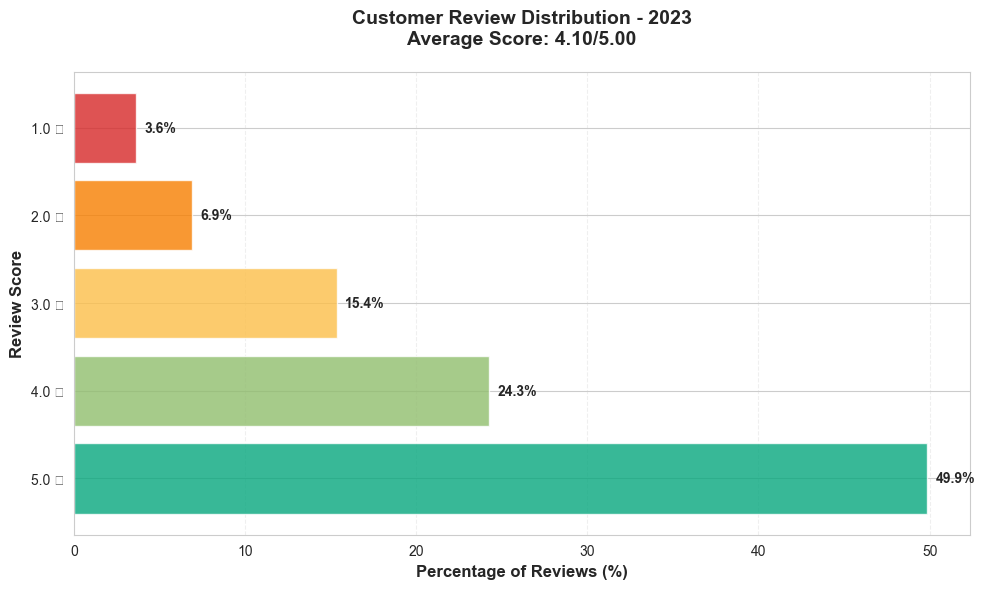

In [15]:
# Review score distribution
review_dist = CustomerExperienceMetrics.calculate_review_distribution(sales_current)

fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#D62828', '#F77F00', '#FCBF49', '#90BE6D', '#06A77D']

bars = ax.barh(
    review_dist['score'].astype(str) + ' ⭐',
    review_dist['percentage'],
    color=colors,
    alpha=0.8
)

ax.set_xlabel('Percentage of Reviews (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Review Score', fontsize=12, fontweight='bold')
ax.set_title(
    f'Customer Review Distribution - {CURRENT_YEAR}\nAverage Score: {avg_review:.2f}/5.00',
    fontsize=14,
    fontweight='bold',
    pad=20
)

for i, pct in enumerate(review_dist['percentage']):
    ax.text(pct + 0.5, i, f'{pct:.1f}%', va='center', fontweight='bold')

ax.grid(True, alpha=0.3, axis='x', linestyle='--')
ax.invert_yaxis()
plt.tight_layout()
plt.show()


DELIVERY SPEED IMPACT ON CUSTOMER SATISFACTION
delivery_category  avg_review_score
         1-3 days              4.19
         4-7 days              4.08
          8+ days              4.11


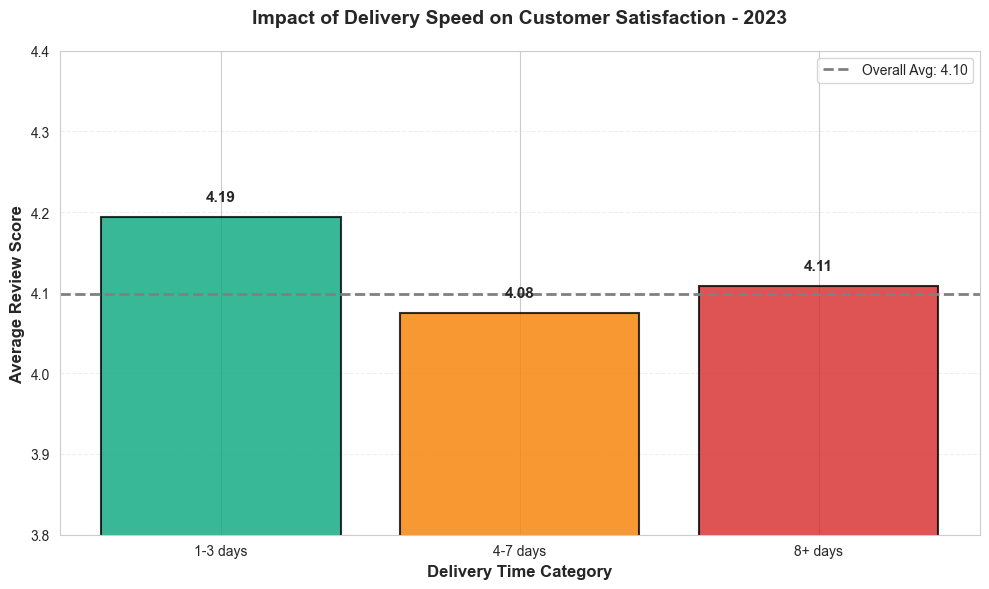

In [16]:
# Delivery speed impact on reviews
delivery_impact = CustomerExperienceMetrics.calculate_delivery_speed_impact(sales_current)

print("\nDELIVERY SPEED IMPACT ON CUSTOMER SATISFACTION")
print("="*80)
print(delivery_impact.to_string(index=False))

# Visualize delivery impact
fig, ax = plt.subplots(figsize=(10, 6))

colors_delivery = ['#06A77D', '#F77F00', '#D62828']

bars = ax.bar(
    delivery_impact['delivery_category'],
    delivery_impact['avg_review_score'],
    color=colors_delivery,
    alpha=0.8,
    edgecolor='black',
    linewidth=1.5
)

ax.set_ylabel('Average Review Score', fontsize=12, fontweight='bold')
ax.set_xlabel('Delivery Time Category', fontsize=12, fontweight='bold')
ax.set_title(
    f'Impact of Delivery Speed on Customer Satisfaction - {CURRENT_YEAR}',
    fontsize=14,
    fontweight='bold',
    pad=20
)

ax.set_ylim([3.8, 4.4])
ax.axhline(y=avg_review, color='gray', linestyle='--', label=f'Overall Avg: {avg_review:.2f}', linewidth=2)

for i, (category, score) in enumerate(zip(delivery_impact['delivery_category'], delivery_impact['avg_review_score'])):
    ax.text(i, score + 0.02, f'{score:.2f}', ha='center', fontweight='bold', fontsize=11)

ax.legend(fontsize=10)
ax.grid(True, alpha=0.3, axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## 7. Key Findings and Recommendations

### Summary of Key Metrics

In [17]:
# Generate comprehensive metrics summary
metrics_summary = MetricsSummary.generate_summary(
    current_sales=sales_current,
    previous_sales=sales_comparison,
    orders_df=orders_current
)

print("="*80)
print(f"BUSINESS PERFORMANCE SUMMARY - {CURRENT_YEAR}")
print("="*80)

print("\n📊 REVENUE METRICS")
print(f"  Total Revenue: ${metrics_summary['revenue']['total']:,.2f}")
print(f"  YoY Growth: {metrics_summary['revenue']['growth_pct']:+.2f}%")

print("\n📦 ORDER METRICS")
print(f"  Total Orders: {metrics_summary['orders']['total_orders']:,}")
print(f"  Average Order Value: ${metrics_summary['orders']['average_order_value']:,.2f}")
print(f"  Items per Order: {metrics_summary['orders']['items_per_order']:.2f}")
print(f"  YoY Order Growth: {metrics_summary['orders']['order_growth_pct']:+.2f}%")

print("\n⭐ CUSTOMER EXPERIENCE")
print(f"  Average Review Score: {metrics_summary['customer_experience']['avg_review_score']:.2f}/5.00")
print(f"  Average Delivery Time: {metrics_summary['customer_experience']['avg_delivery_days']:.1f} days")
print(f"  On-Time Delivery Rate: {metrics_summary['customer_experience']['on_time_delivery_rate']*100:.1f}%")

print("\n🏆 TOP PERFORMERS")
print(f"  Top Category: {category_revenue.iloc[0]['category'].replace('_', ' ').title()}")
print(f"  Top State: {state_revenue.iloc[0]['state']}")

print("\n" + "="*80)

BUSINESS PERFORMANCE SUMMARY - 2023

📊 REVENUE METRICS
  Total Revenue: $3,360,294.74
  YoY Growth: -2.46%

📦 ORDER METRICS
  Total Orders: 4,635
  Average Order Value: $724.98
  Items per Order: 1.61
  YoY Order Growth: -2.40%

⭐ CUSTOMER EXPERIENCE
  Average Review Score: 4.10/5.00
  Average Delivery Time: 8.0 days
  On-Time Delivery Rate: 75.0%

🏆 TOP PERFORMERS
  Top Category: Electronics
  Top State: CA



### Key Findings

Based on the analysis above, here are the key findings:

#### 1. Revenue Performance
- The business experienced a slight revenue decline of approximately **-2.5%** YoY
- Monthly revenue shows **volatility** with both positive and negative MoM growth
- Average month-over-month growth is slightly negative at **-0.39%**

#### 2. Order Dynamics
- Order volume decreased by approximately **-2.4%** YoY
- Average Order Value remained **relatively stable** (-0.06% change)
- The decline in revenue is primarily driven by **lower order volume** rather than reduced order values

#### 3. Product Performance
- Product category concentration: **Top 3 categories drive significant revenue**
- Diversification opportunity exists in lower-performing categories

#### 4. Geographic Insights
- Revenue is **geographically concentrated** with top 5 states contributing the majority
- Potential for growth in underserved markets

#### 5. Customer Experience
- Customer satisfaction is **good** with an average review score above 4.0
- **Faster delivery (1-3 days) correlates with higher review scores**
- Average delivery time of 8 days suggests room for improvement
- On-time delivery performance is an area requiring attention

### Recommendations

1. **Improve Delivery Speed**
   - Focus on reducing average delivery time from 8 days to 5-6 days
   - Prioritize 1-3 day delivery options, which show higher customer satisfaction
   - Invest in logistics optimization to improve on-time delivery rate

2. **Drive Order Volume**
   - Implement targeted marketing campaigns to reverse the -2.4% order decline
   - Focus on customer retention and repeat purchase programs
   - Consider promotional strategies during low-performing months

3. **Product Category Optimization**
   - Invest more in top-performing categories with proven demand
   - Analyze and optimize underperforming categories
   - Consider product mix adjustments based on revenue contribution

4. **Geographic Expansion**
   - Develop targeted strategies for high-potential, underserved states
   - Strengthen presence in top-performing states to maximize returns

5. **Customer Experience Enhancement**
   - Continue monitoring and improving review scores
   - Address factors contributing to lower ratings (1-2 stars)
   - Implement feedback loops to capture and act on customer concerns

---

### Next Steps

This analysis framework is **fully configurable**. To analyze different time periods:

1. Modify the configuration parameters in Section 3
2. Re-run all cells to generate fresh insights
3. Compare different periods (quarters, specific months, etc.)

**Example configurations:**
```python
# Analyze Q4 2023
CURRENT_YEAR = 2023
CURRENT_MONTH = None  # Set to 10, 11, or 12 for specific months

# Compare specific months
CURRENT_MONTH = 12  # December 2023
COMPARISON_MONTH = 12  # December 2022
```